# 5. Link to measurement data

![graph](images/f.PNG) 


# Initialize module

In [21]:
#add library path if necessary
import sys
sys.path.append("../../FlowMater/")

#load module
from ExperimentManager import ExperimentManager

In [22]:
# automatically load and parse data in the database folder

#path to the database folder (you can use wild cards, such as *)
base_path="database/*/**"

#path to the keyword file
json_path="database/lot_keywords.json"

#load graph data
experiment_manager = ExperimentManager(base_path=base_path,json_path=json_path)
%time experiment_manager.auto_load()

begin parsing graphml files
Loading graphs
Initiating FP compressor
Calculating features
Wall time: 147 ms


In [42]:
import pandas as pd
#automatically converted dataframe
df=experiment_manager.dataframe
smart_df=df.loc[:,~(df.nunique()==1)]
smart_df

,MeasurementA_load_data,Slope
normal_experiment0_database\exp1\exp1.graphml,database\exp1/data.csv,1.161616
normal_experiment1_database\exp2\exp2.graphml,database\exp2/data.csv,1.310632


C:\Users\kan\Anaconda3\envs\FlowMater2\lib\site-packages\ipykernel\__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


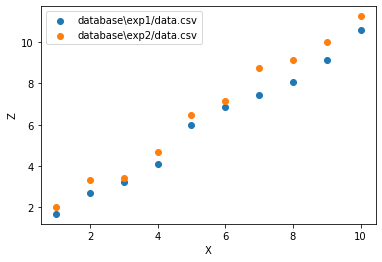

In [51]:
# you will need prepare custom codes to parse each measurement data
import matplotlib.pyplot as plt
import numpy as np


# for instance, analyze slope of each measurement data
def auto_parse(path):
    measurement_df=pd.read_csv(path)
    x=measurement_df["X"]
    z=measurement_df["Z"]
    plt.scatter(x,z,label=path)
    plt.xlabel("X")
    plt.ylabel("Z")
    slope=np.mean(z/x)
    
    return slope


path_list=smart_df["MeasurementA_load_data"]
slope_list=[auto_parse(path) for path in path_list]
plt.legend()

smart_df["Slope"]=slope_list


In [52]:
smart_df

,MeasurementA_load_data,Slope
normal_experiment0_database\exp1\exp1.graphml,database\exp1/data.csv,1.161616
normal_experiment1_database\exp2\exp2.graphml,database\exp2/data.csv,1.310632
